In [1]:
from pandas import read_csv
df = read_csv(r'D:\Prog\python\CSV dataset\tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'price_per_person'}>],
       [<Axes: title={'center': 'CC Number'}>, <Axes: >]], dtype=object)

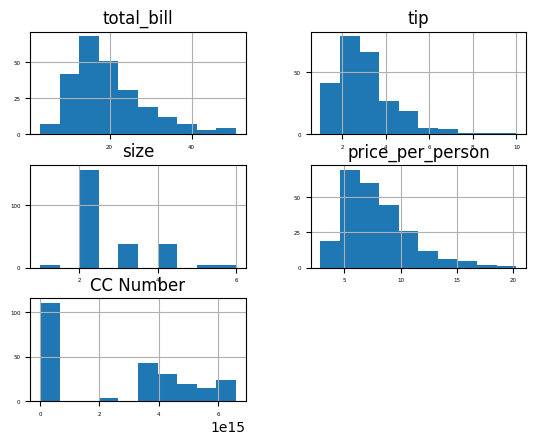

In [3]:
df.hist(xlabelsize=4,ylabelsize=4)

In [4]:
def get_data(df):
  data = df.drop(columns = ['Payer Name','CC Number','Payment ID'],inplace=True)
  X = df.drop(columns = ['tip'])
  data = df
  X = X

  X = X.iloc[:,:]
  y = data.iloc[:,1]
  return X,y

def use_data():
  df = read_csv(r'D:\Prog\python\CSV dataset\tips.csv')
  X,y = get_data(df=df)
  return X,y

X,y = use_data()

In [5]:
X

,total_bill,sex,smoker,day,time,size,price_per_person
0,16.99,Female,No,Sun,Dinner,2,8.49
1,10.34,Male,No,Sun,Dinner,3,3.45
2,21.01,Male,No,Sun,Dinner,3,7.00
3,23.68,Male,No,Sun,Dinner,2,11.84
4,24.59,Female,No,Sun,Dinner,4,6.15
...,...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3,9.68
240,27.18,Female,Yes,Sat,Dinner,2,13.59
241,22.67,Male,Yes,Sat,Dinner,2,11.34
242,17.82,Male,No,Sat,Dinner,2,8.91


In [6]:
from pandas import DataFrame
X = DataFrame(X)

In [7]:
y = DataFrame(y)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   sex               244 non-null    object 
 2   smoker            244 non-null    object 
 3   day               244 non-null    object 
 4   time              244 non-null    object 
 5   size              244 non-null    int64  
 6   price_per_person  244 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


numerical_ix :
 Index(['total_bill', 'size', 'price_per_person'], dtype='object')
categorical_ix :
 Index(['sex', 'smoker', 'day', 'time'], dtype='object')
MAE : 0.95 (0.17) 


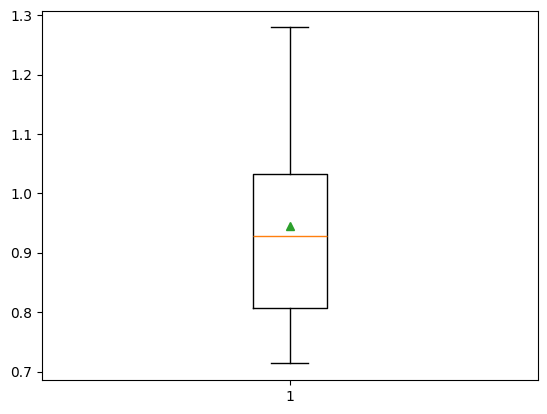

In [9]:
numerical_ix = X.select_dtypes(include=['float64','int64']).columns
print('numerical_ix :\n',numerical_ix)
categorical_ix = X.select_dtypes(include=[object]).columns
print('categorical_ix :\n',categorical_ix,)
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
transform = [('onehot',OneHotEncoder(),categorical_ix),('robus',RobustScaler(),numerical_ix)]

from sklearn.compose import ColumnTransformer
col_transform = ColumnTransformer(transform)
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
model = SVR(kernel='rbf',gamma='scale',C=100)
pipeline = Pipeline(steps=[('transform',col_transform),('model',model)])
from sklearn.model_selection import KFold ,cross_val_score
cv = cv = KFold(n_splits=10,shuffle=True,random_state=34)
y = y.values
score = cross_val_score(pipeline,X=X,y=y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
from numpy import absolute,mean,std
score = absolute(score)

from matplotlib import pyplot
pyplot.boxplot(score,showmeans=True)
print("MAE : %.2f (%.2f) "%(mean(score),std(score)))